# Probabilities, Likelihoods, and Bayes Theorem

Created: 08/25/2023 by Tom Lever

Updated: 08/25/2023 by Tom Lever

**SUMMARY**: In this notebook we will be reviewing some probability distributions, showing histograms and scatterplots to visualize the distributions in Python in Section 1. In Section 2 we define likelihoods, and show how to compute them in Python. In Section 3 we explain Bayes Theorem, and show how to use Bayes Theorem to compute the posterior probability for parameters based on observed data, using the likelihoods from Section 2.

## Section 1

In this section we generate samples from a variety of distributions and use seaborn and matplotlib to plot the resulting data.

First 5 values from uniform distribution:
[ 5.51575127 11.16328597 14.40616231 14.22377287 14.19055868]


C:\Users\Tom\AppData\Local\Temp\ipykernel_16656\184879292.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


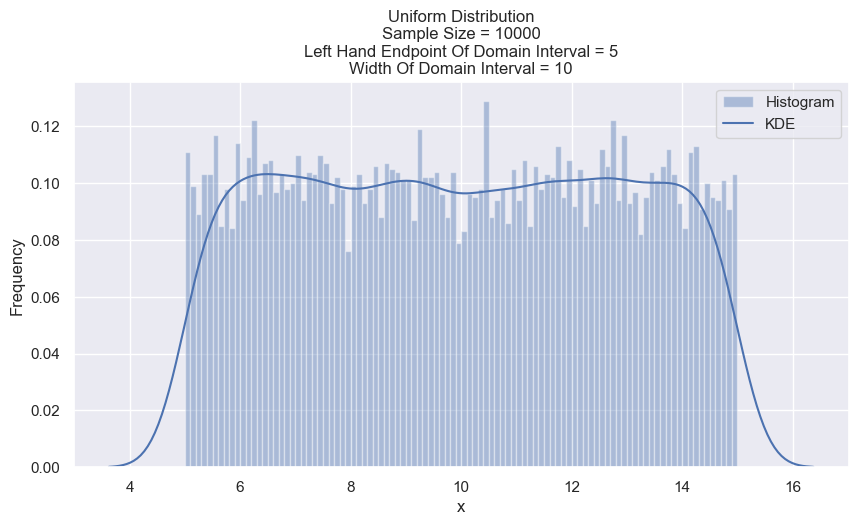

In [1]:
from scipy.stats import uniform
sample_size = 10000
left_hand_endpoint_of_domain_interval = 5
width_of_domain_interval = 10
array_of_uniformly_distributed_random_numbers = uniform.rvs(size = sample_size, loc = left_hand_endpoint_of_domain_interval, scale = width_of_domain_interval)
print("First 5 values from uniform distribution:")
print(array_of_uniformly_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_uniformly_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Uniform Distribution"
        + f"\nSample Size = {sample_size}"
        + f"\nLeft Hand Endpoint Of Domain Interval = {left_hand_endpoint_of_domain_interval}"
        + f"\nWidth Of Domain Interval = {width_of_domain_interval}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.show()

First 5 values from normal distribution:
[3.5470065  2.54427828 3.99543234 7.12799457 0.05778755]


C:\Users\Tom\AppData\Local\Temp\ipykernel_16656\2340865738.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


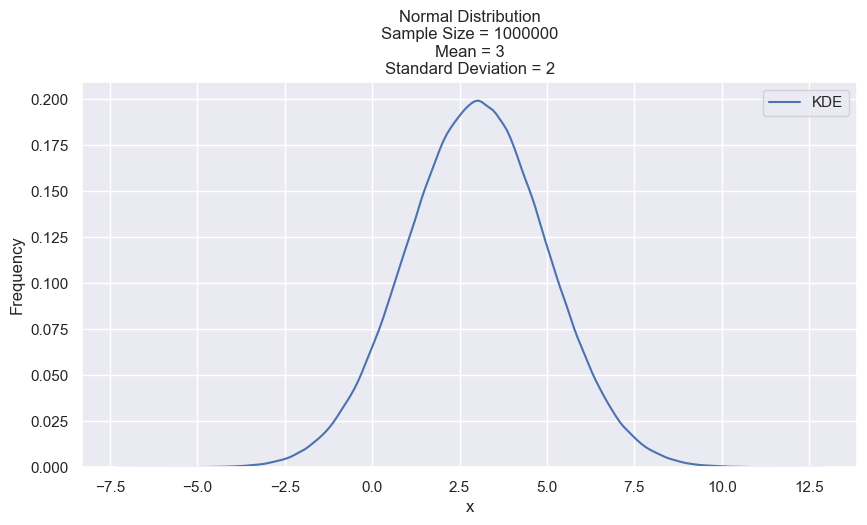

In [2]:
from scipy.stats import norm
sample_size = 1000000
mean = 3
standard_deviation = 2
array_of_normally_distributed_random_numbers = norm.rvs(
    size = sample_size,
    loc = mean,
    scale = standard_deviation
)
print("First 5 values from normal distribution:")
print(array_of_normally_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_normally_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist = False
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Normal Distribution"
        + f"\nSample Size = {sample_size}"
        + f"\nMean = {mean}"
        + f"\nStandard Deviation = {standard_deviation}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.show()

In [3]:
array_of_normally_distributed_numbers = norm.rvs(size = 100, loc = 3, scale = 2)
print(array_of_normally_distributed_numbers)

[-1.77583537  2.1352128   0.60805219 -0.39130628  4.01918253  3.58174798
  1.0273123   3.70795148  3.87572642  5.90275888  1.57104766  4.38922836
  0.55059329  0.16842132  2.14789209  5.04674624  2.67527044  3.02392339
  4.61678887  4.53867987 -0.9665004   3.75789344  2.10822973  2.16933122
  6.0494465   3.03974273  4.78861927  3.28702748  4.63380073  3.27970978
  3.68072228  5.63165105  3.68041633  3.24422368  0.28883688  3.26138611
 -0.23635084  4.51258802  2.77381559  3.09358166  4.9595167   2.53812258
  3.16139572 -0.25594288  1.13330312  3.35492274  1.77507736  1.81424953
  4.89208302  6.09699424  3.92322657  0.80215298  0.21947652  4.4502451
  0.39478281  3.53151237  1.95659673  4.12601076 -2.25536164  1.43631482
  4.12370967  1.35399166  3.14527812  3.65066276  1.36996167 -1.48220134
  6.59620073  2.49272567  0.35109554  2.29542932  4.47990585  2.08208361
  4.41219097  3.79005439  3.62619326  6.63501191  0.98802082  0.5100666
  3.75058439  0.73259545  2.76118155 -1.54850057  1.2

First 5 values from Bernoulli distribution:
[1 1 0 1 1]


C:\Users\Tom\AppData\Local\Temp\ipykernel_16656\206209471.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


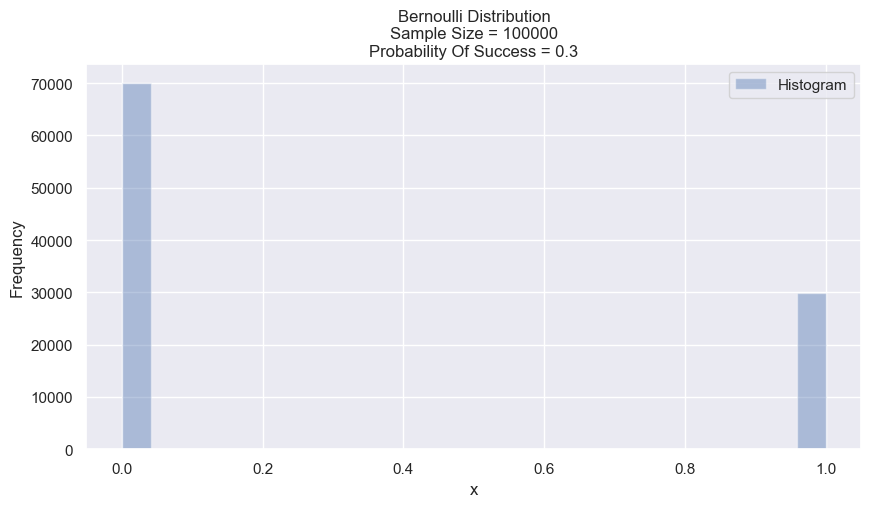

In [4]:
from scipy.stats import bernoulli
sample_size = 100000
probability_of_success = 0.3
array_of_Bernoulli_distributed_random_numbers = bernoulli.rvs(
    size = sample_size,
    p = probability_of_success
)
print('First 5 values from Bernoulli distribution:')
print(array_of_Bernoulli_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    array_of_Bernoulli_distributed_random_numbers,                  
    kde = False,
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel='x',
    ylabel='Frequency',
    title = (
        "Bernoulli Distribution"
        + f"\nSample Size = {sample_size}"
        + f"\nProbability Of Success = {probability_of_success}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.show()